# Exercise 7
## Photometric analysis with CIGALE


Edit pcigale.ini:
- data_file = A85_cigale.mag
- bands = u_prime, u_prime_err, g_prime, g_prime_err, r_prime, r_prime_err, i_prime, i_prime_err, z_prime, z_prime_err
- filters = u_prime & g_prime & r_prime & i_prime & z_prime
- redshift = "eval np.linspace(0.04, 0.08, 100)"


In [2]:
from wand.image import Image as WImage
from subprocess import call
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

#call(["pcigale", "init"])
#call(["pcigale", "genconf"])
#call(["pcigale-plots", "sed"])

In [19]:
call(["pcigale", "check"])

0

In [20]:
call(["pcigale", "run"])

0

# Read Cigale output file and SDSS data 

In [3]:
cigale_data = Table.read("out/results.fits", hdu=1)
cigale_data["best.stellar.m_star"].format = "6.4f"
cigale_data["best.universe.redshift"].format = "2.2f"
mass_cigale = np.log(cigale_data["best.stellar.m_star"])
red_cigale = cigale_data["best.universe.redshift"]

file_data = Table.read("A85_sdss.csv")
red_sdss = file_data["redshift"]
red_photo = file_data["photoz"]
x = np.arange(0,len(file_data["redshift"]),1)

## Histogram of masses

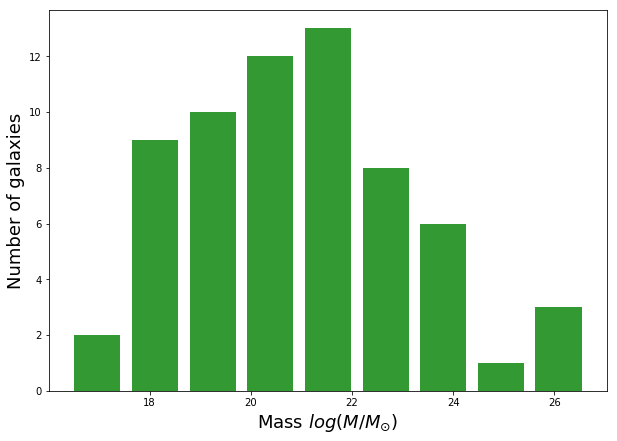

In [15]:
plt.figure(figsize=(10,7))
bins0 = np.linspace(min(mass_cigale),max(mass_cigale),10)
plt.hist(mass_cigale, bins0, histtype = "bar", alpha = 0.8, linewidth=1, color="green", rwidth=0.8)
plt.xlabel("Mass $log(M / M_{\odot}$)", fontsize=18)
plt.ylabel("Number of galaxies", fontsize=18)
plt.show;

## Compare chalculated photometric redshift to the given SDSS redshift 

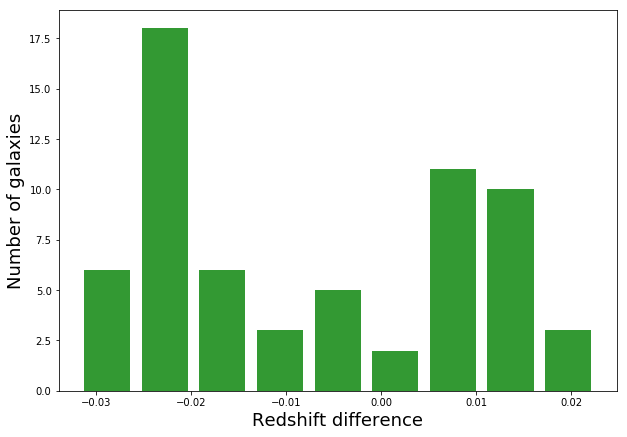

In [5]:
red_diff_sdss  = red_sdss-red_cigale
plt.figure(figsize=(10,7))
bins0 = np.linspace(min(red_diff_sdss),max(red_diff_sdss),10)
plt.hist(red_diff_sdss, bins0, histtype = "bar", alpha = 0.8, linewidth=1, color="green", rwidth=0.8)
plt.xlabel("Redshift difference", fontsize=18)
plt.ylabel("Number of galaxies", fontsize=18)
plt.show;

## Compare chalculated photometric redshift to the given photometric redshift 

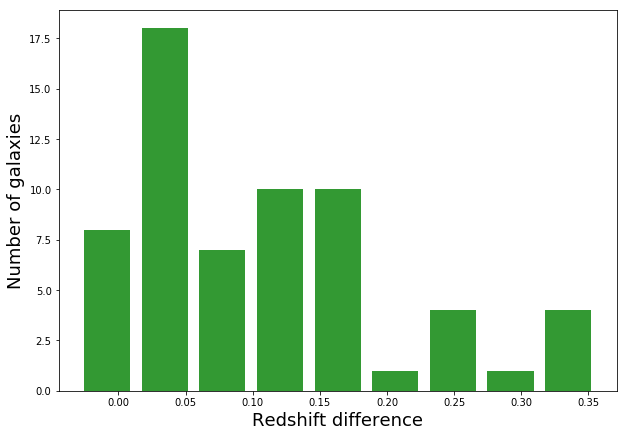

In [12]:
red_diff_photo = red_photo-red_cigale
plt.figure(figsize=(10,7))
bins0 = np.linspace(-0.03,max(red_diff_photo),10)
plt.hist(red_diff_photo, bins0, histtype = "bar", alpha = 0.8, linewidth=1, color="green", rwidth=0.8)
plt.xlabel("Redshift difference", fontsize=18)
plt.ylabel("Number of galaxies", fontsize=18)
plt.show;